# 4. RS CVn Stars Corner Plots

## 4.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner

## 4.2. <a href="https://www.dropbox.com/s/nd2bo8uu8qnic50/rs-cvn_corner-plots.zip?dl=1">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── HR1099_chain.h5
│   ├── HR1099_lmfit_params.txt
│   ├── thermal-gs.mplstyle
│   ├── UXArietis_chain.h5
│   ├── UXArietis_lmfit_params.txt
│   ├── ...
├── figures
│   ├── HR1099_corner.pdf
│   ├── HR1099_corner.png
│   ├── UXArietis_corner.pdf
│   ├── UXArietis_corner.png
│   ├── ...
├── notebooks
│   ├── rs-cvn_corner-plots.ipynb
│   ├── ...
.
.
.

## 4.3. HR 1099

### 4.3.1. Load

In [2]:
sampler = emcee.backends.HDFBackend('../data/HR1099_chain.h5')
samples = sampler.get_chain(flat=True)
samples /= np.array([1, 1, 1, 1, np.pi/180])
lmfit_params = np.loadtxt('../data/HR1099_lmfit_params.txt')
lmfit_params /= np.array([1, 1, 1, 1, np.pi/180])

plt.style.use('../data/thermal-gs.mplstyle')

### 4.3.2. Plot

/var/folders/72/x005f_sn1nq047zkj8cd5ppw0000gn/T/ipykernel_3230/3012208650.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_under(color='w')


/var/folders/72/x005f_sn1nq047zkj8cd5ppw0000gn/T/ipykernel_3230/3012208650.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cornerFig.show()


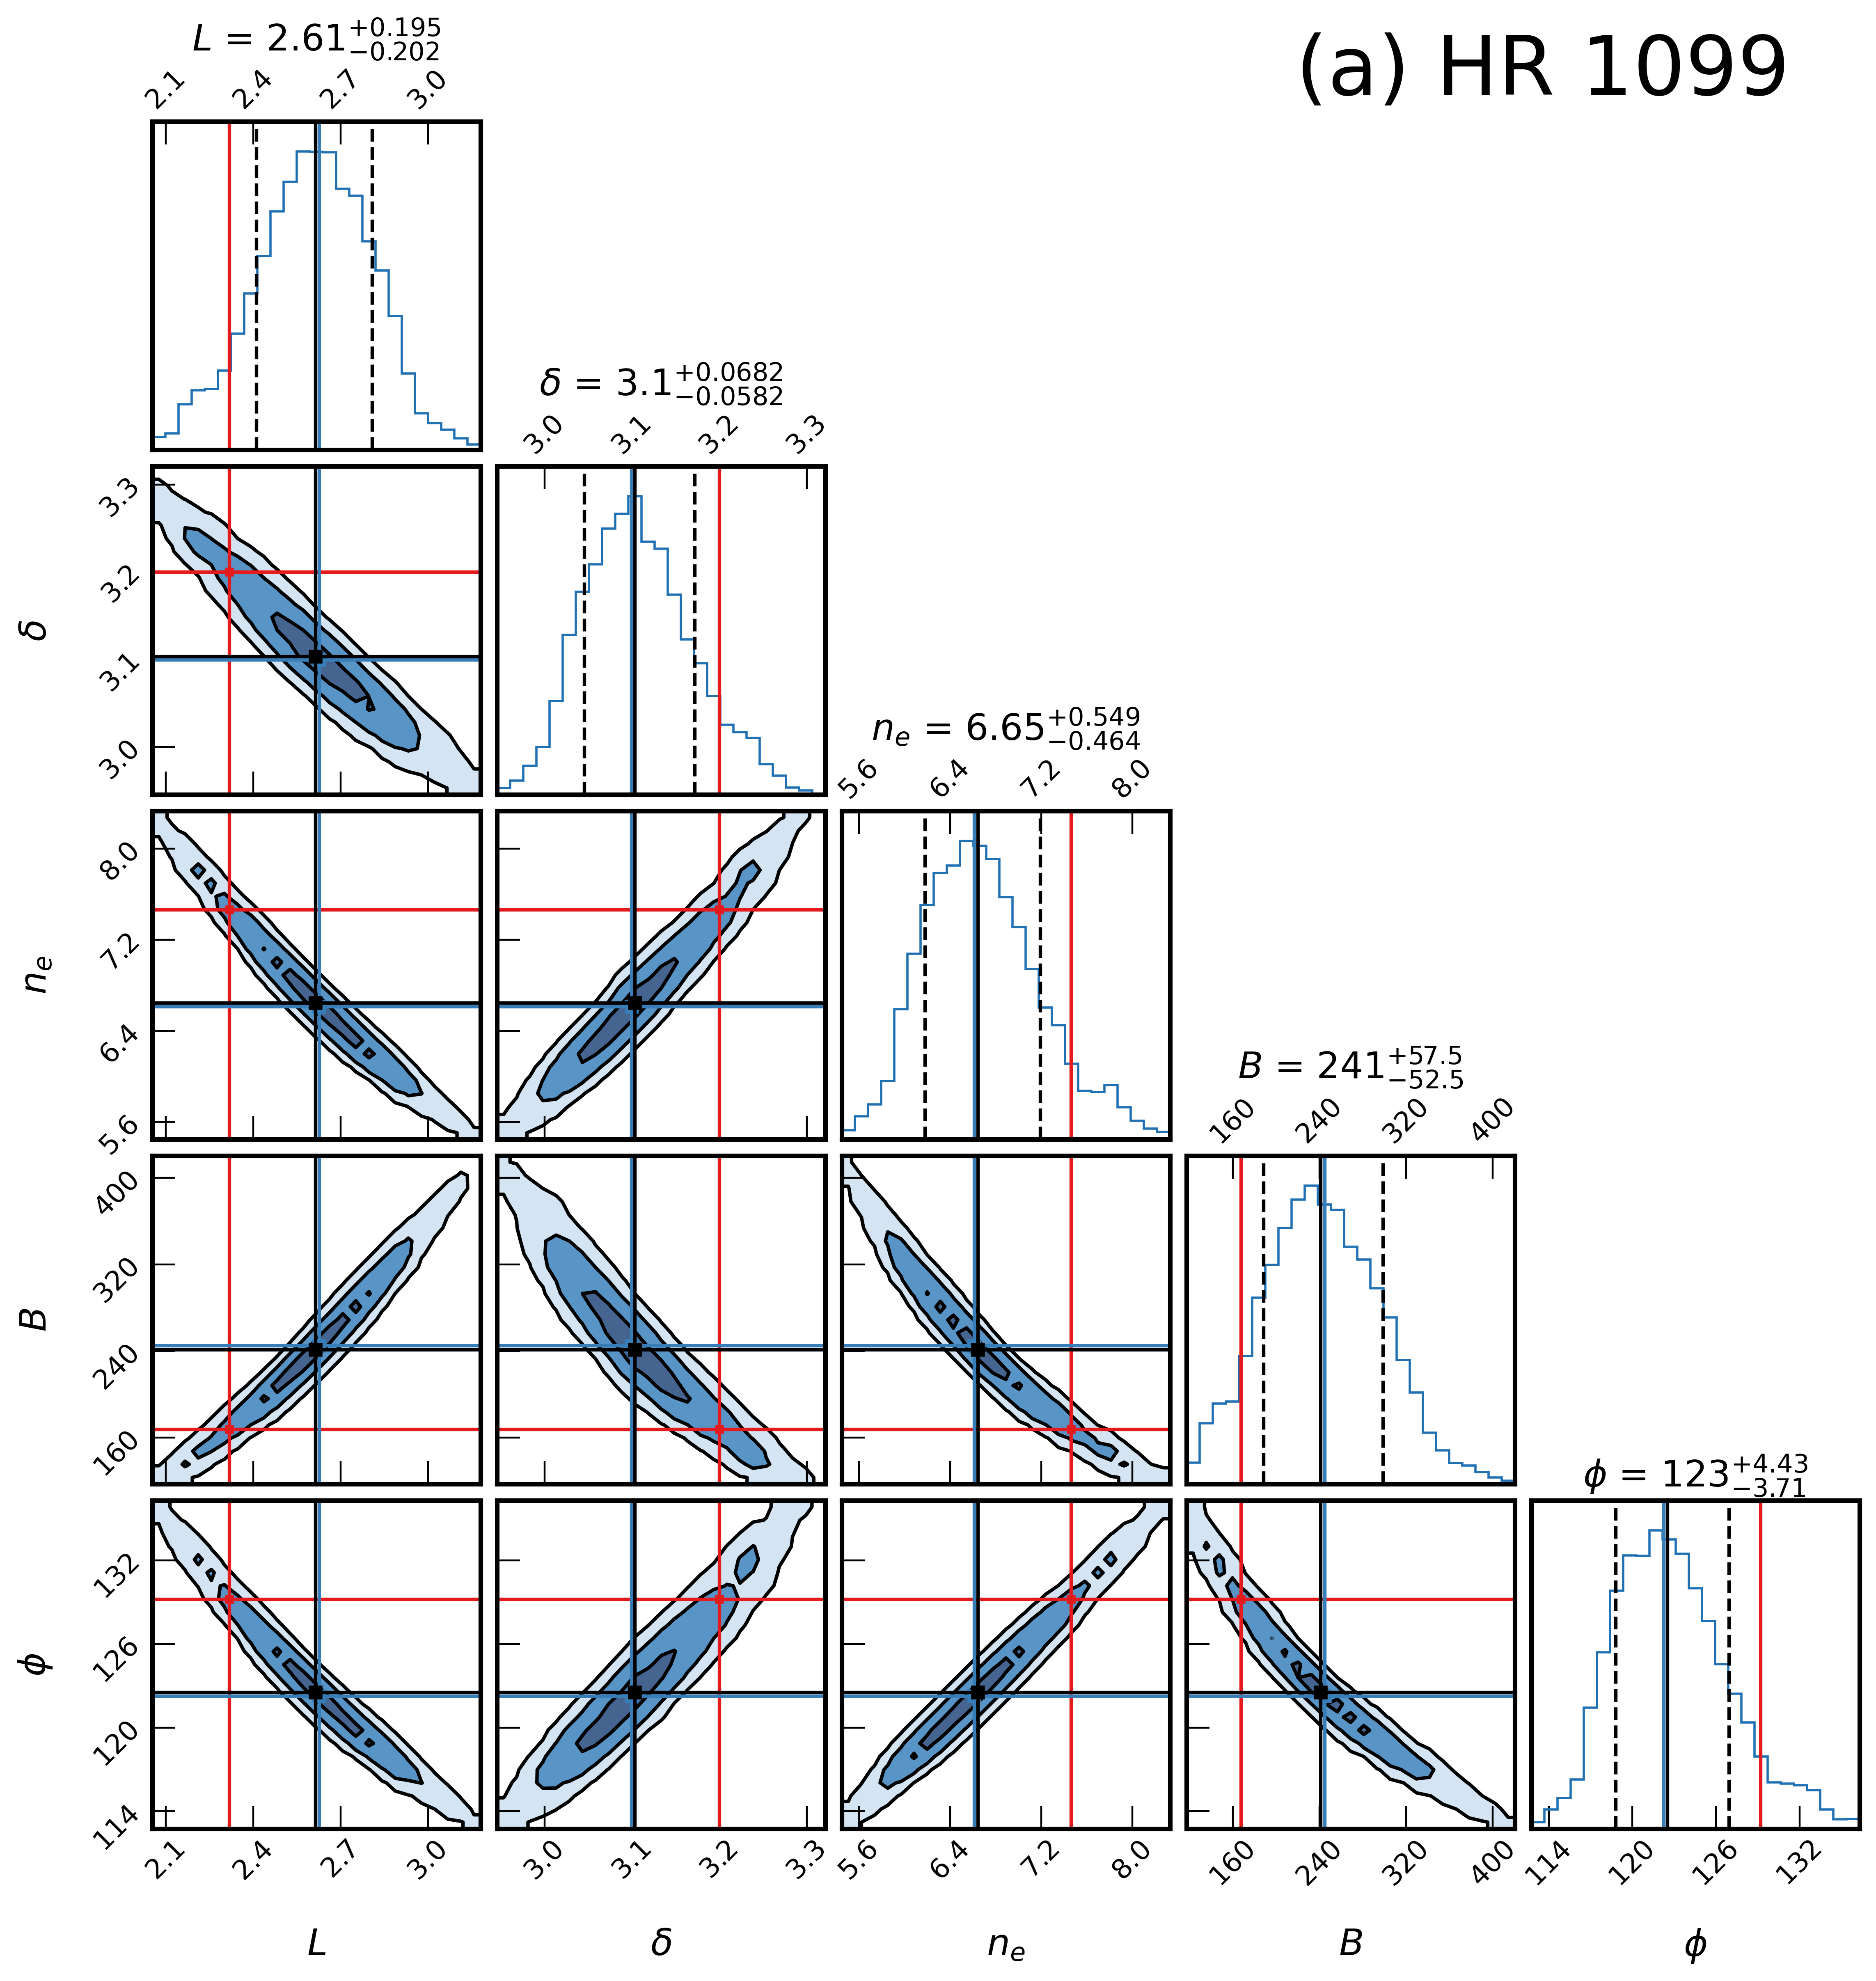

In [3]:
thin = 10000
plt_labels = ['$L$', '$\delta$', '$n_e$', '$B$', '$\phi$']
median_values = np.median(samples[::thin, :], axis=0)
winnerWalker = np.argmax(sampler.get_log_prob(flat=True))
mostParams = samples[winnerWalker]
cmap = mpl.cm.get_cmap('Blues')
cmap.set_under(color='w')

cornerFig = corner.corner(samples[::thin, :],color='black',top_ticks=True,quiet=True, show_titles=True,use_math_text=True,
labels=plt_labels,plot_datapoints=False,quantiles=[0.16, 0.84], title_quantiles=[0.16, 0.5, 0.84], label_kwargs={"fontsize":16}, 
title_kwargs={"fontsize":16}, max_n_ticks=4, bins=25, title_fmt='3.3g', plot_density=False, fill_contours=True,
smooth=0.5, levels=(0.393, 0.865, 0.989), hist_kwargs={'color':cmap(0.75)}, 
contourf_kwargs={'colors':(cmap(-1), cmap(0.25), cmap(0.75), cmap(0.999)), 'alpha':0.75})

corner.overplot_lines(cornerFig, lmfit_params, color='C1', label='Least squares')
corner.overplot_points(cornerFig, np.array([lmfit_params]), color='C1', marker='s', ms=3)
corner.overplot_lines(cornerFig, mostParams, color='C0', label='Most probable')
corner.overplot_points(cornerFig, np.array([mostParams]), color='C0', marker='s', ms=5)
corner.overplot_lines(cornerFig, median_values, color='black', label='Median')
corner.overplot_points(cornerFig, np.array([median_values]), color='black', marker='s', ms=5)

cornerFig.text(0.675, 0.98, '(a) HR 1099', fontsize=36) 
cornerFig.set_facecolor('white')
plt.savefig('../figures/HR1099_corner.png', bbox_inches='tight')
plt.savefig('../figures/HR1099_corner.pdf', bbox_inches='tight')
cornerFig.show()

## 4.4. UX Arietis

4.4.1. Load

In [4]:
sampler = emcee.backends.HDFBackend('../data/UXArietis_chain.h5')
samples = sampler.get_chain(flat=True)
samples /= np.array([1, 1, 1, 1, np.pi/180])
lmfit_params = np.loadtxt('../data/UXArietis_lmfit_params.txt')
lmfit_params /= np.array([1, 1, 1, 1, np.pi/180])

### 4.4.2. Plot

/var/folders/72/x005f_sn1nq047zkj8cd5ppw0000gn/T/ipykernel_3230/75839143.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  cmap.set_under(color='w')


/var/folders/72/x005f_sn1nq047zkj8cd5ppw0000gn/T/ipykernel_3230/75839143.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cornerFig.show()


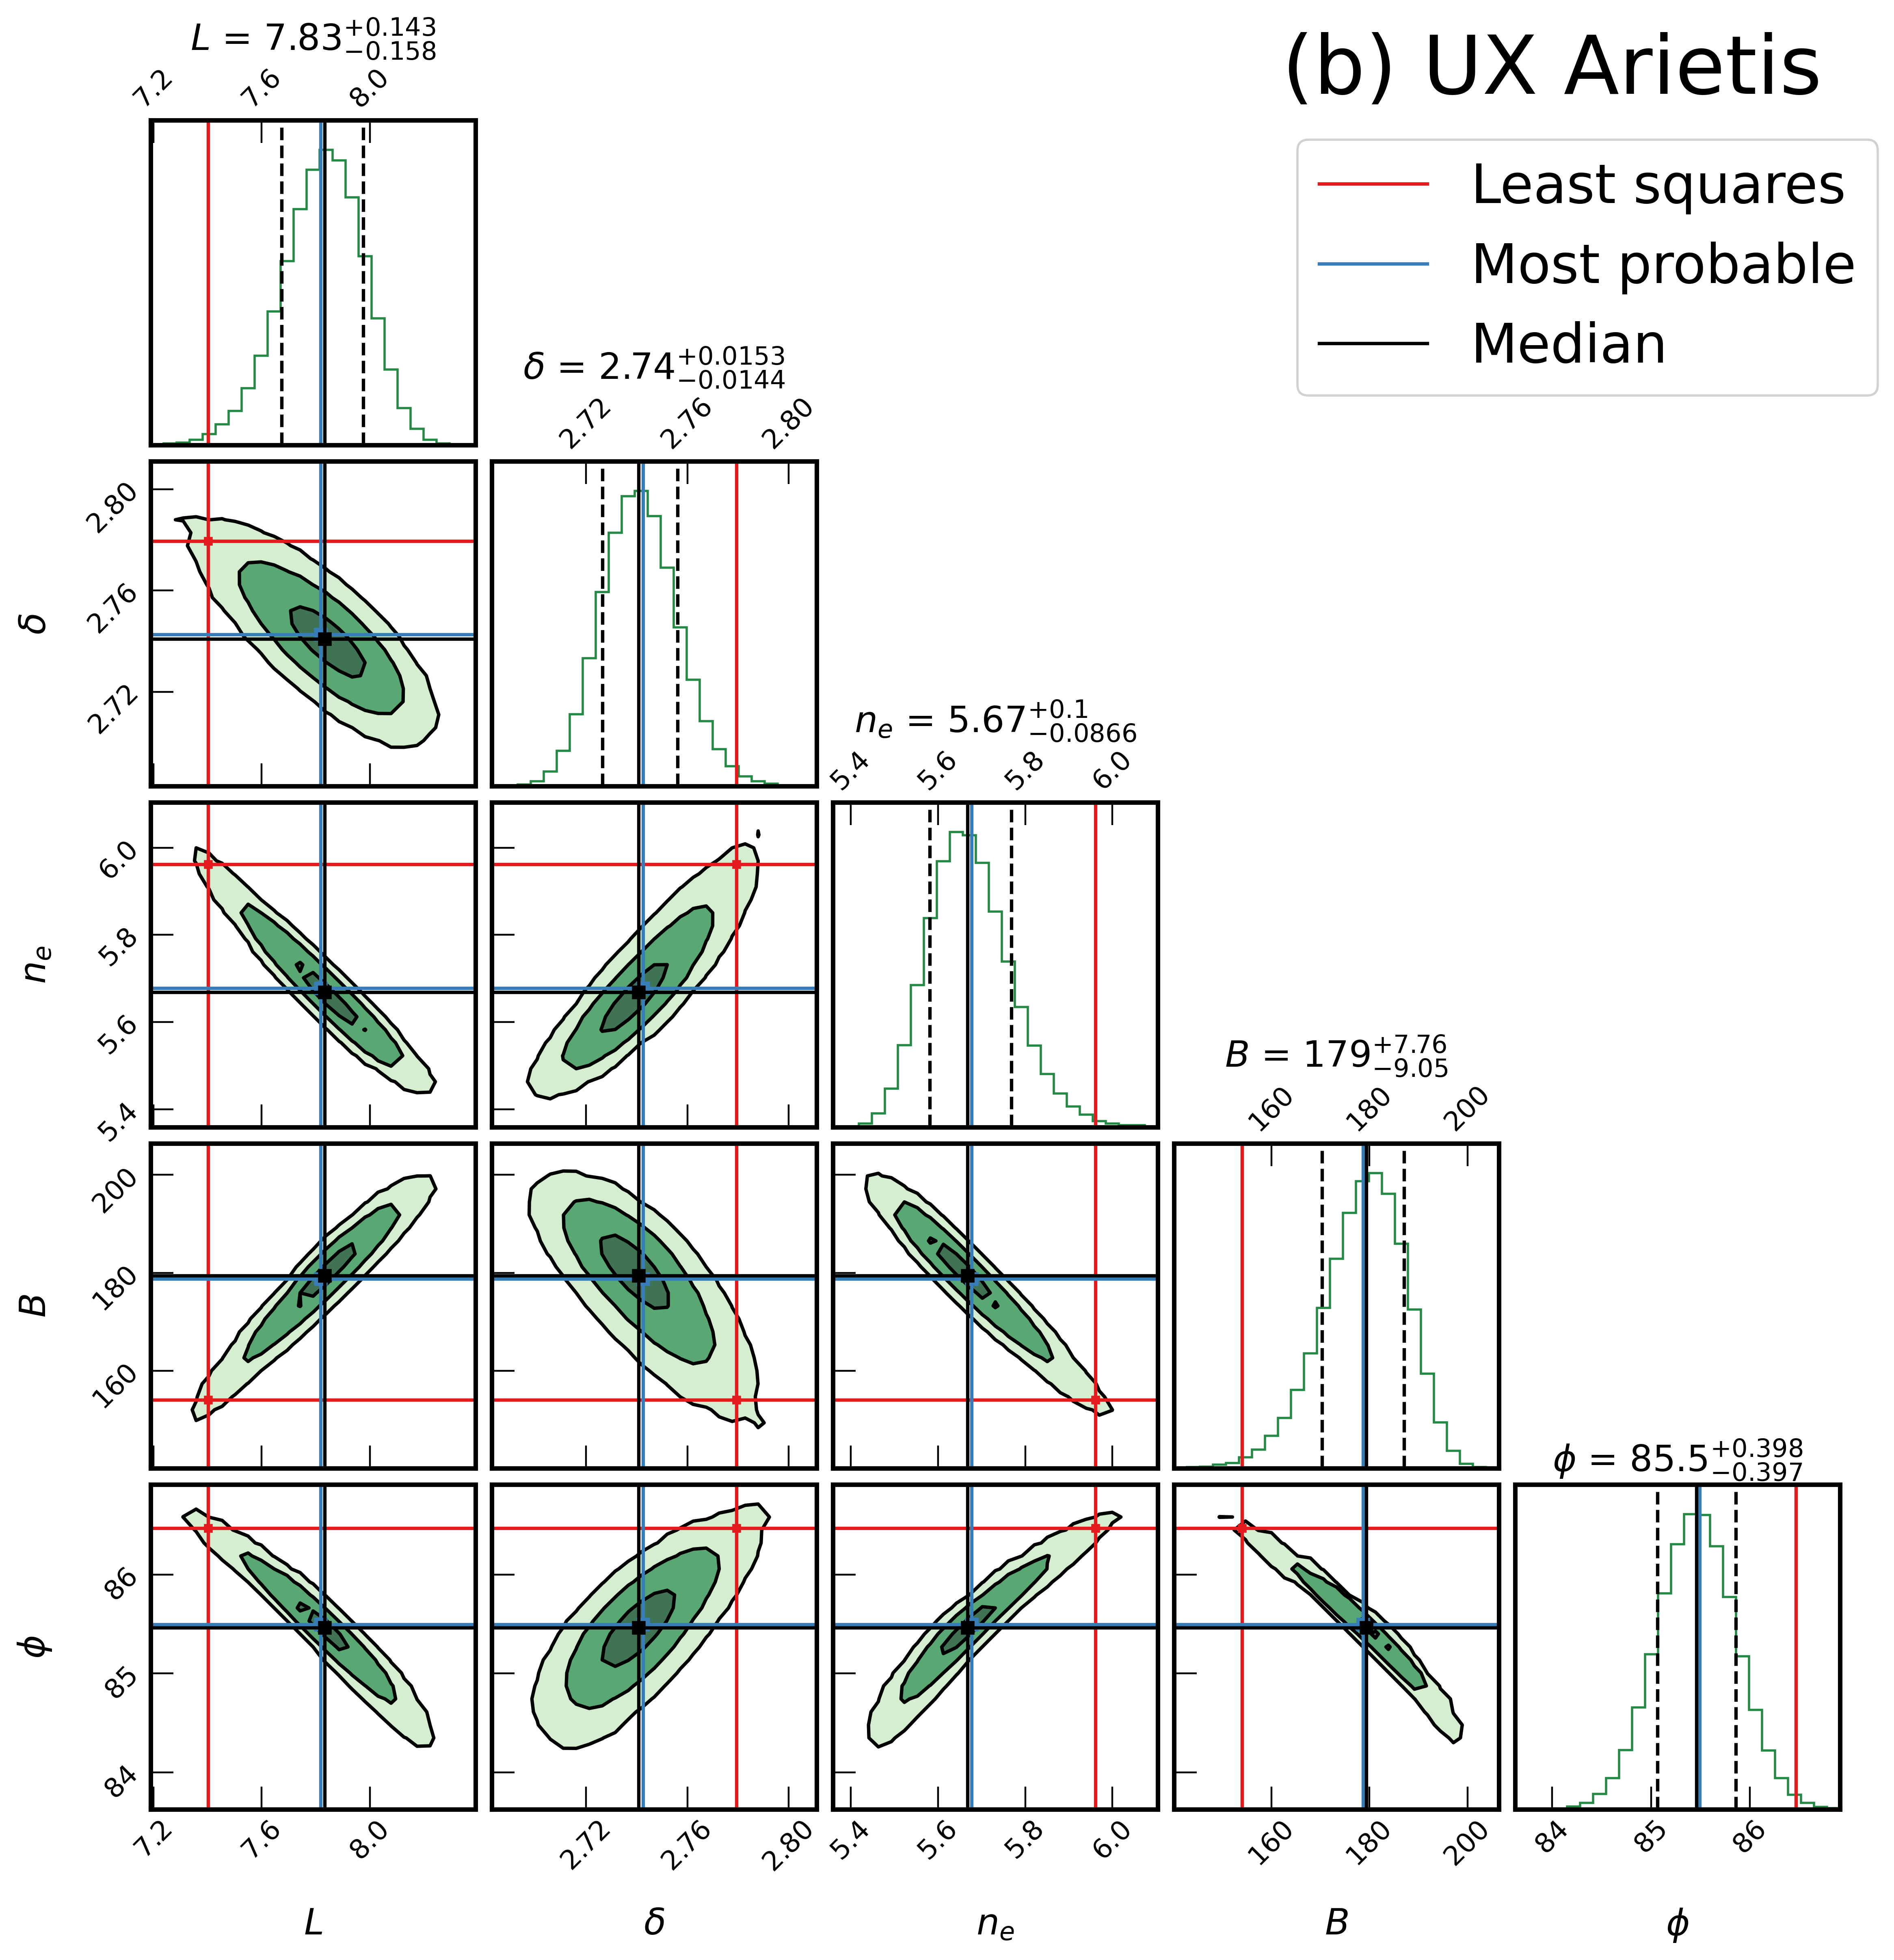

In [5]:
thin = 1
plt_labels = ['$L$', '$\delta$', '$n_e$', '$B$', '$\phi$']
median_values = np.median(samples[::thin, :], axis=0)
winnerWalker = np.argmax(sampler.get_log_prob(flat=True))
mostParams = samples[winnerWalker]
cmap = mpl.cm.get_cmap('Greens')
cmap.set_under(color='w')

cornerFig = corner.corner(samples[::thin, :],color='black',top_ticks=True,quiet=True, show_titles=True,use_math_text=True,
labels=plt_labels,plot_datapoints=False,quantiles=[0.16, 0.84], title_quantiles=[0.16, 0.5, 0.84], label_kwargs={"fontsize":16}, 
title_kwargs={"fontsize":16}, max_n_ticks=4, bins=25, title_fmt='3.3g', plot_density=False, fill_contours=True, 
levels=(0.393, 0.865, 0.989), hist_kwargs={'color':cmap(0.75)}, 
contourf_kwargs={'colors':(cmap(-1), cmap(0.25), cmap(0.75), cmap(0.999)), 'alpha':0.75})

corner.overplot_lines(cornerFig, lmfit_params, color='C1', label='Least squares')
corner.overplot_points(cornerFig, np.array([lmfit_params]), color='C1', marker='s', ms=3)
corner.overplot_lines(cornerFig, mostParams, color='C0', label='Most probable')
corner.overplot_points(cornerFig, np.array([mostParams]), color='C0', marker='s', ms=5)
corner.overplot_lines(cornerFig, median_values, color='black', label='Median')
corner.overplot_points(cornerFig, np.array([median_values]), color='black', marker='s', ms=5)

handles,labels = cornerFig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cornerFig.legend(by_label.values(), by_label.keys(), fontsize=24, loc='upper right', bbox_to_anchor=(1, 0.97))
cornerFig.text(0.675, 0.98, '(b) UX Arietis', fontsize=36) 
cornerFig.set_facecolor('white')
plt.savefig('../figures/UXArietis_corner.png', bbox_inches='tight')
plt.savefig('../figures/UXArietis_corner.pdf', bbox_inches='tight')
cornerFig.show()